In [13]:
import numpy as np
import matplotlib.pyplot as plt


In [14]:
def standardize_data(data):
    mean = np.mean(data, axis=0)
    data_centered = data - mean
    return data_centered, mean

In [15]:
def covariance(data):
    covariance_matrix = np.cov(data, rowvar=False)
    return covariance_matrix

In [16]:
def eigendecomposition(covariance_matrix):
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    return eigenvalues, eigenvectors

def sort_eigen_pairs(eigenvalues, eigenvectors):
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    return sorted_eigenvalues, sorted_eigenvectors

In [17]:
def select_top_components(eigenvectors, num_components):
    selected_eigenvectors = eigenvectors[:, :num_components]
    return selected_eigenvectors

In [18]:
def project_data(data, selected_eigenvectors):
    reduced_data = np.dot(data, selected_eigenvectors)
    return reduced_data

In [19]:
def pca(data, num_components):
    data_centered, mean = standardize_data(data)
    covariance_matrix = covariance(data_centered)
    eigenvalues, eigenvectors = eigendecomposition(covariance_matrix)
    sorted_eigenvalues, sorted_eigenvectors = sort_eigen_pairs(eigenvalues, eigenvectors)
    selected_eigenvectors = select_top_components(sorted_eigenvectors, num_components)
    reduced_data = project_data(data_centered, selected_eigenvectors)
    
    return reduced_data, selected_eigenvectors, sorted_eigenvalues[:num_components]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-301.7391067979609..193.4274273219361].


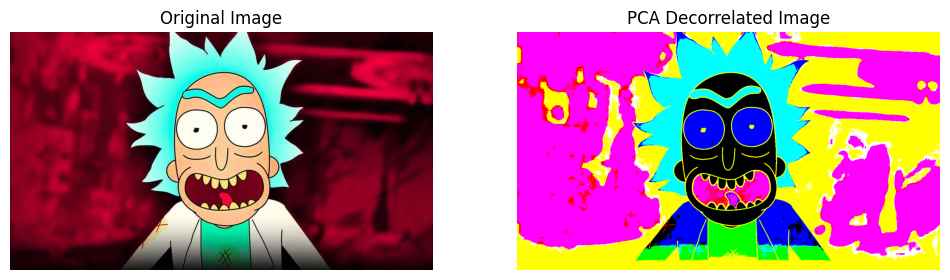

In [34]:
from PIL import Image

def part_a(image_data):
    pixels = image_data.reshape(-1, 3)

    transformed_pixels, components, explained_variance = pca(pixels, num_components=3)

    transformed_image_data = transformed_pixels.reshape(image_data.shape)
    
    return transformed_image_data

def show_images(original_image, transformed_image):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    axs[0].imshow(original_image)
    axs[0].set_title("Original Image")
    axs[0].axis("off")

    axs[1].imshow(transformed_image)
    axs[1].set_title("PCA Decorrelated Image")
    axs[1].axis("off")

    plt.show()

image_path = 'test-image.jpg'
image = Image.open(image_path)
image_data = np.array(image)
transformed_image = part_a(image_data)
show_images(image_data, transformed_image)

In [21]:
import os

def load_and_process_image(image_path, image_size=(32, 32)):
    image = Image.open(image_path).convert("L")
    resized_image = image.resize(image_size)
    return np.array(resized_image).flatten()

def create_matrices_for_indices(person_folder_path, index_lists, image_size=(32, 32)):
    all_images = sorted(os.listdir(person_folder_path))

    matrices = []

    for indices in index_lists:
        image_vectors = []

        for i in indices:
            image_filename = all_images[i - 1]
            image_path = os.path.join(person_folder_path, image_filename)
            image_vector = load_and_process_image(image_path, image_size)
            image_vectors.append(image_vector)
        
        image_matrix = np.stack(image_vectors, axis=1)
        matrices.append(image_matrix)
        print(f"Created matrix with shape {image_matrix.shape} for indices: {indices}")

    return matrices

index_lists = [
    [1, 7, 8, 9, 36, 37],
    [2, 5, 10, 11, 12, 13, 15, 39, 40, 41, 42, 44],
    [3, 6, 14, 16, 17, 19, 20, 43, 45, 46, 48, 49],
    [18, 21, 22, 23, 24, 25, 26, 47, 50, 51, 52, 53, 54, 55],
    [4, 27, 28, 29, 30, 31, 32, 33, 34, 35, 56, 57, 58, 59, 60, 61, 62, 63, 64]
]

person_folder_path = 'YaleB/B01P00' 
matrices = create_matrices_for_indices(person_folder_path, index_lists)
for matrice in matrices:
    print(matrice)

Created matrix with shape (1024, 6) for indices: [1, 7, 8, 9, 36, 37]
Created matrix with shape (1024, 12) for indices: [2, 5, 10, 11, 12, 13, 15, 39, 40, 41, 42, 44]
Created matrix with shape (1024, 12) for indices: [3, 6, 14, 16, 17, 19, 20, 43, 45, 46, 48, 49]
Created matrix with shape (1024, 14) for indices: [18, 21, 22, 23, 24, 25, 26, 47, 50, 51, 52, 53, 54, 55]
Created matrix with shape (1024, 19) for indices: [4, 27, 28, 29, 30, 31, 32, 33, 34, 35, 56, 57, 58, 59, 60, 61, 62, 63, 64]
[[ 68  83 142 109  39  40]
 [ 79  97 161 141  49  46]
 [ 93 107 176 181  68  58]
 ...
 [ 17   4   6   5  40  47]
 [ 21   9   8   7  38  38]
 [ 16  17  18  16  52  42]]
[[ 84  91  28 ...   8   8   4]
 [ 90 103  53 ...  10  12   5]
 [ 99 111  77 ...  16  21   6]
 ...
 [ 20   7   6 ...  16   5  70]
 [ 16   9   9 ...  38   7  69]
 [  9  16  14 ...  61  25  81]]
[[ 97  72  90 ...   3   3   3]
 [115  73  94 ...   5   4   5]
 [136  72  88 ...   5   4   5]
 ...
 [  6  17   6 ...  86  88  88]
 [  9  13   7 

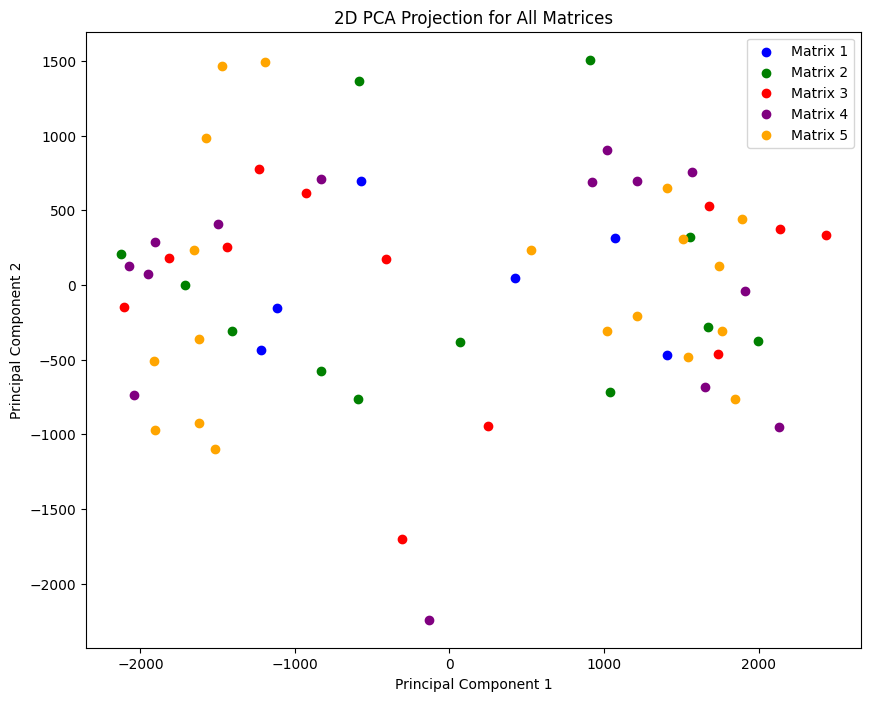

In [38]:
import matplotlib.pyplot as plt

def pca_2(matrices, num_components=2):
    transformed_data_list = []

    for i, matrix in enumerate(matrices):
        transformed_data, _, _ = pca(matrix.T, num_components=num_components)  # Transpose to get K x 1024
        transformed_data_list.append((transformed_data, f"Matrix {i+1}"))

    return transformed_data_list

def visualize_2d(transformed_data_list):

    plt.figure(figsize=(10, 8))
    colors = ['blue', 'green', 'red', 'purple', 'orange']  

    for i, (data, label) in enumerate(transformed_data_list):
        color = colors[i % len(colors)]
        plt.scatter(data[:, 0], data[:, 1], marker='o', color=color, label=label)
    
    plt.title("2D PCA Projection for All Matrices")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend()
    plt.show()

transformed_data_list = pca_2(matrices)
visualize_2d(transformed_data_list)

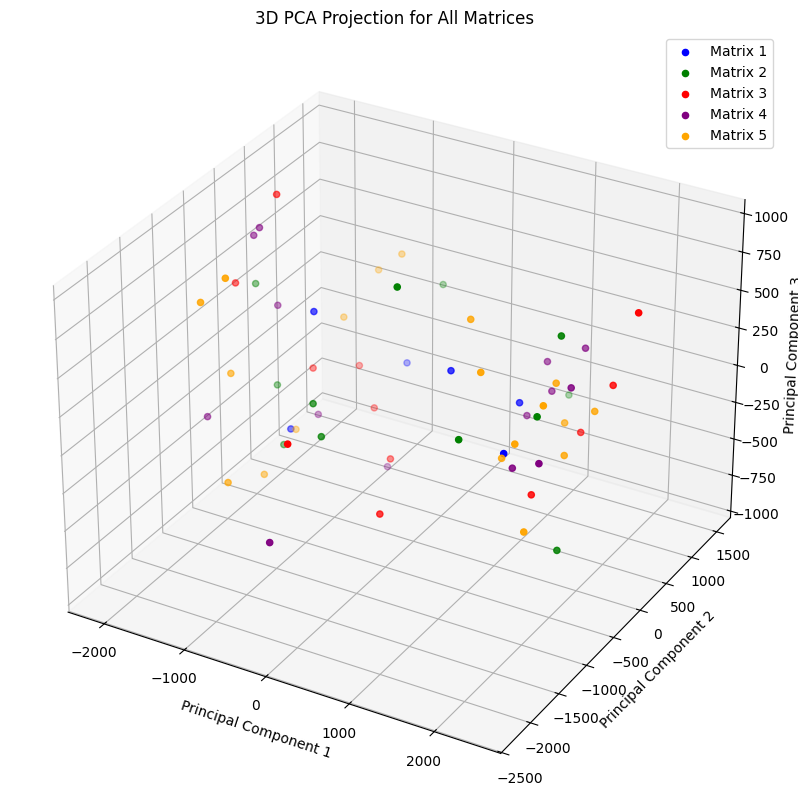

In [36]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def pca_3(matrices, num_components=3):
    transformed_data_list = []

    for i, matrix in enumerate(matrices):
        transformed_data, _, _ = pca(matrix.T, num_components=num_components)
        transformed_data_list.append((transformed_data, f"Matrix {i+1}"))

    return transformed_data_list

def visualize_3d(transformed_data_list):

    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    colors = ['blue', 'green', 'red', 'purple', 'orange']

    for i, (data, label) in enumerate(transformed_data_list):
        color = colors[i % len(colors)] 
        ax.scatter(data[:, 0], data[:, 1], data[:, 2], marker='o', color=color, label=label)

    ax.set_title("3D PCA Projection for All Matrices")
    ax.set_xlabel("Principal Component 1")
    ax.set_ylabel("Principal Component 2")
    ax.set_zlabel("Principal Component 3")
    ax.legend()
    plt.show()

transformed_data_list = pca_3(matrices)
visualize_3d(transformed_data_list)